Testing Models

In [56]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pickle
import numpy as np
from tensorflow.keras.models import load_model

In [57]:
with open('fashion_mnist_data2.pkl', 'rb') as f:
    loadedData = pickle.load(f)


x_train_cnn = loadedData['x_train_norm']
x_test_cnn = loadedData['x_test_norm']
x_train_norm = loadedData.get('x_test_norm')
x_test_norm = loadedData['x_test_norm']
x_train_flat = loadedData['x_train_flat']
x_test_flat = loadedData['x_test_flat']
y_test_cnn = loadedData['y_test_cnn']

print(loadedData)



{'x_test_norm': array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0.,

In [58]:
modelAlexNet = load_model('cnn_alexnet_model.h5')
modelVGGNet = load_model('cnn_model.h5')
modelResNet = load_model('cnn_resnet_model.h5')

In [59]:
n = 10
images = x_test_cnn[:n]
imagePrediction = y_test_cnn[:10]
prediction = modelAlexNet.predict(x_test_cnn[:n])
predictedClasses = np.argmax(prediction, axis=1)

confidence = np.max(prediction, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


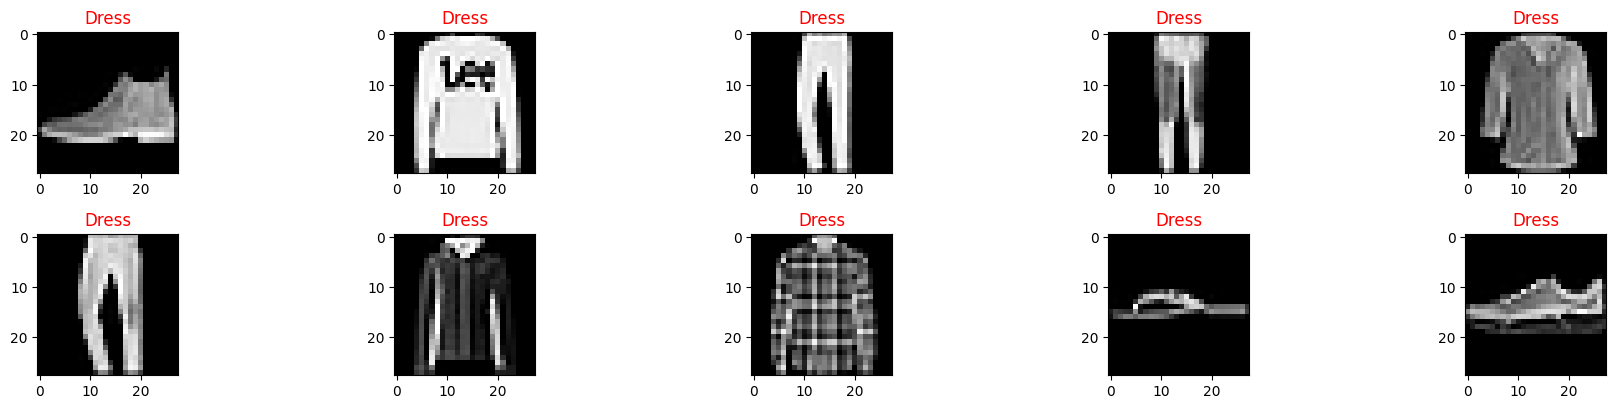

In [60]:
plt.figure(figsize=(18, 8))

for i in range(n):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i], cmap = 'grey')
    if np.argmax(prediction[i]) == imagePrediction[i]:
        plt.title(class_names[np.argmax(prediction[i])], color='green')
    else:
        plt.title(class_names[np.argmax(prediction[i])], color='red')

plt.tight_layout()
plt.show()